<a href="https://colab.research.google.com/github/zackives/upenn-cis-2450/blob/main/19_Module_4_Part_I_Time_Varying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time-Varying Data


## Basic Setup

### Autograder setup

In [ ]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 99999999 # YOUR PENN-ID GOES HERE AS AN INTEGER##PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO

In [ ]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [ ]:
%set_env HW_ID=cis2450_fall24_HW9

env: HW_ID=cis2450_fall24_HW9


In [ ]:
!pip3 install penngrader-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.6 MB/s eta 0:00:00


In [ ]:
import os
from penngrader.grader import *

grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 99999999

Make sure this correct or we will not be able to store your grade


## Visualizing Timeseries

In [ ]:
!wget -nc https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

--2024-11-15 17:19:57--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘daily-min-temperatures.csv’

daily-min-temperatu 100%[===================>]  66.33K  --.-KB/s    in 0.02s   

2024-11-15 17:19:57 (2.81 MB/s) - ‘daily-min-temperatures.csv’ saved [67921/67921]



In [ ]:
!head daily-min-temperatures.csv

"Date","Temp"
"1981-01-01",20.7
"1981-01-02",17.9
"1981-01-03",18.8
"1981-01-04",14.6
"1981-01-05",15.8
"1981-01-06",15.8
"1981-01-07",15.8
"1981-01-08",17.4
"1981-01-09",21.8


In [ ]:
import pandas as pd
from datetime import datetime

# Read as a dataframe, convert date entries to the index
data = pd.read_csv('daily-min-temperatures.csv', \
                   dtype={'Date': str, 'Temp': float})
data['date'] = data['Date'].apply(\
                                  lambda x: datetime.strptime(x, '%Y-%m-%d'))
data = data.set_index('date')

# This is a Series
data['Temp']

,Temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


<Axes: xlabel='date'>

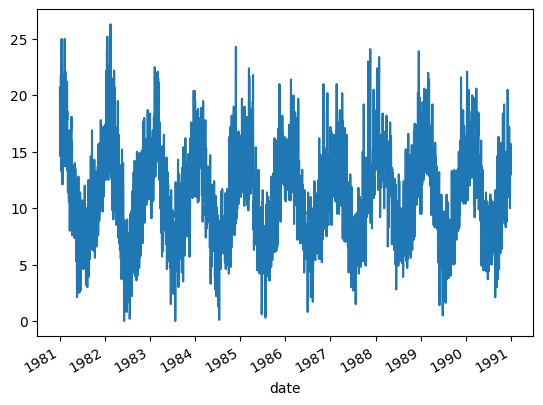

In [ ]:
data['Temp'].plot()

<ipython-input-10-d4c9882324d5>:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(pd.Grouper(freq='A'))


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

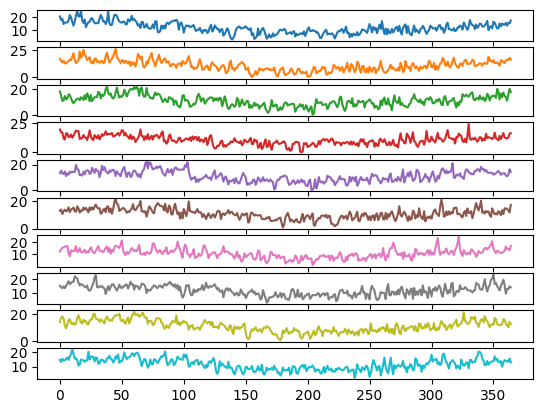

In [ ]:
series = data['Temp']

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.plot(subplots=True, legend=False)

<Axes: >

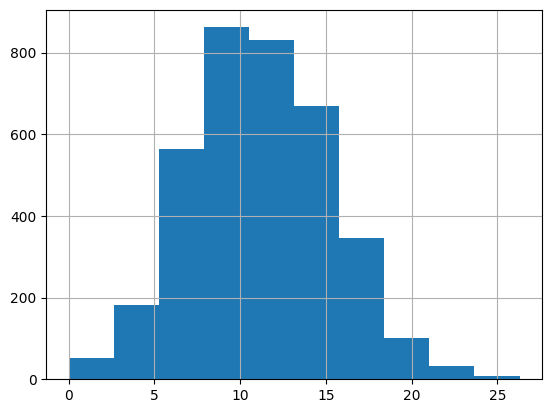

In [ ]:
series.hist()

<ipython-input-12-1422404fe7a7>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(pd.Grouper(freq='A'))


<Axes: >

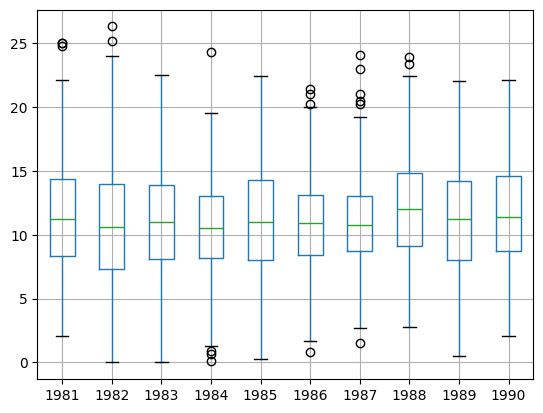

In [ ]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.boxplot()

<ipython-input-13-f0b54f1dcdaf>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  groups = one_year.groupby(pd.Grouper(freq='M'))


<Axes: >

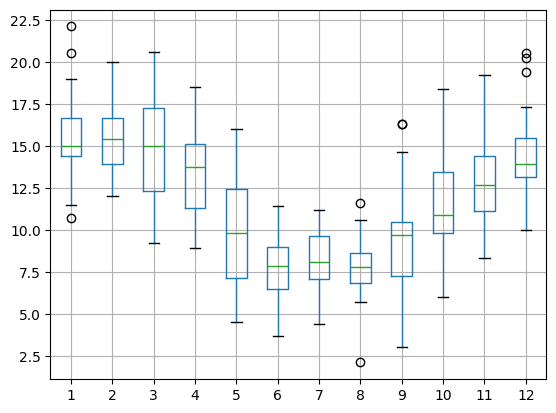

In [ ]:
one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()

<ipython-input-14-5205c7fe1c2b>:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(pd.Grouper(freq='A'))


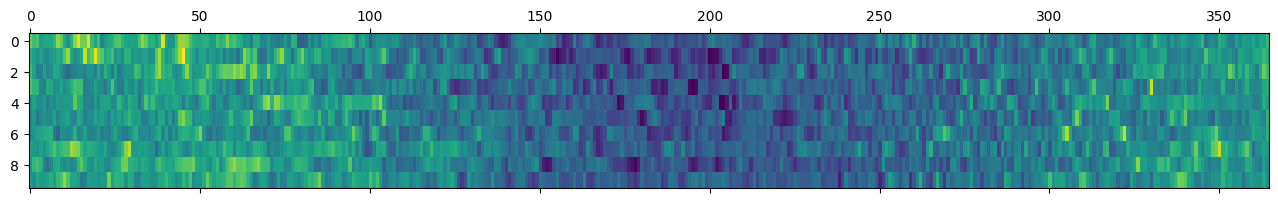

In [ ]:
import matplotlib.pyplot as plt

groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')

In [ ]:
years

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
1981,20.7,17.9,18.8,14.6,15.8,15.8,15.8,17.4,21.8,20.0,...,15.0,12.8,15.0,14.2,14.0,15.5,13.3,15.6,15.2,17.4
1982,17.0,15.0,13.5,15.2,13.0,12.5,14.1,14.8,16.2,15.8,...,10.8,15.6,15.3,13.9,13.0,15.3,16.3,15.8,17.7,16.3
1983,18.4,15.0,10.9,11.4,14.8,12.1,12.8,16.2,15.5,13.0,...,12.2,16.7,13.8,17.5,15.0,13.9,11.1,16.1,20.4,18.0
1984,19.5,17.1,17.1,12.0,11.0,16.3,16.1,13.0,13.4,15.2,...,14.2,11.4,13.7,16.5,12.8,12.2,12.0,12.6,16.0,16.4
1985,13.3,15.2,13.1,12.7,14.6,11.0,13.2,12.2,14.4,13.7,...,13.7,12.0,13.1,13.2,13.3,11.5,10.8,12.0,16.3,14.4
1986,12.9,13.8,10.6,12.6,13.7,12.6,13.1,15.4,11.9,13.8,...,11.6,9.7,13.4,10.5,14.7,14.6,14.2,13.2,11.7,17.2
1987,12.3,13.8,15.3,15.6,16.2,16.3,16.8,11.0,8.5,13.2,...,11.2,11.4,11.2,12.1,12.7,16.2,14.2,14.3,13.3,16.7
1988,15.3,14.3,13.5,15.0,13.6,15.2,17.0,18.7,16.5,17.4,...,11.9,15.2,17.3,19.8,15.8,9.5,12.9,12.9,14.8,14.1
1989,14.3,17.4,18.5,16.8,11.5,9.5,12.2,15.7,16.3,13.6,...,11.8,12.0,12.7,16.4,16.0,13.3,11.7,10.4,14.4,12.7
1990,14.8,13.3,15.6,14.5,14.3,15.3,16.4,14.8,17.4,18.8,...,13.2,13.9,10.0,12.9,14.6,14.0,13.6,13.5,15.7,13.0


In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2024-11-15 17:20:15--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2024-11-15 17:20:15 (22.0 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



<Axes: xlabel='date'>

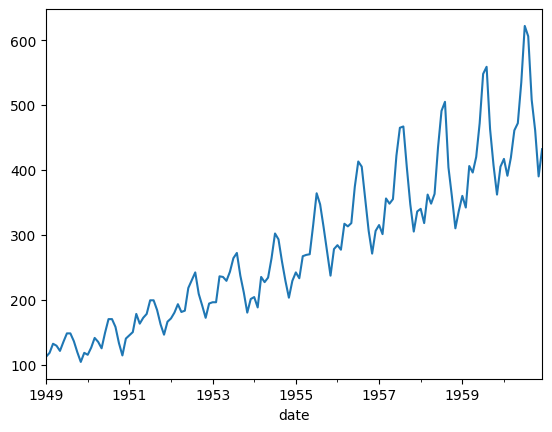

In [ ]:
# Read as a dataframe, convert date entries to the index
data = pd.read_csv('airline-passengers.csv',
                   dtype={'Month': str, 'Passengers': int})
data['date'] = data['Month'].apply(\
                                  lambda x: datetime.strptime(x, '%Y-%m'))
data = data.set_index('date')
series = data['Passengers']

series.plot()

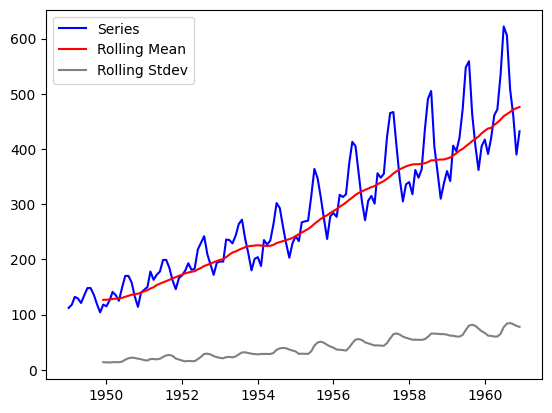

In [ ]:
# Rolling statistics, computed over windows -- more or less exactly
# like a sliding window of length 12, stride 1
rolling_mean = pd.Series.rolling(series,center=False,window=12).mean()
rolling_std = pd.Series.rolling(series,center=False,window=12).std()

plt.plot(series,color='blue',label='Series')
plt.plot(rolling_mean,color='red', label='Rolling Mean')
plt.plot(rolling_std,color='gray',label='Rolling Stdev')
plt.legend()

<ipython-input-19-1422404fe7a7>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  groups = series.groupby(pd.Grouper(freq='A'))


<Axes: >

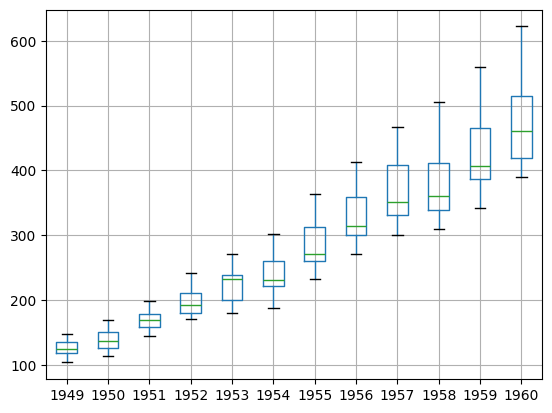

In [ ]:
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.boxplot()

In [ ]:
!wget http://rcmt2.bo.ingv.it/Italydataset1976-2015.csv

--2024-11-15 17:20:19--  http://rcmt2.bo.ingv.it/Italydataset1976-2015.csv
Resolving rcmt2.bo.ingv.it (rcmt2.bo.ingv.it)... 193.204.89.159
Connecting to rcmt2.bo.ingv.it (rcmt2.bo.ingv.it)|193.204.89.159|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291713 (285K) [text/csv]
Saving to: ‘Italydataset1976-2015.csv’

Italydataset1976-20 100%[===================>] 284.88K   566KB/s    in 0.5s    

2024-11-15 17:20:20 (566 KB/s) - ‘Italydataset1976-2015.csv’ saved [291713/291713]



In [ ]:
quakes_df = pd.read_csv('Italydataset1976-2015.csv',header=None,names=['ev_id',\
  'date', 'time_orig', 'time_orig_decimals', 'latitude', 'longitude', 'depth_km', \
  'Mb', 'Ms', 'region', 'source_type', 'bwave_n_stations', 'bwave_n_inv', 'bwave_cutoff', \
  'mwave_n_stations', 'mwave_n_inv', 'mwave_cutoff', 'swave_n_stations', 'swave_n_inv', \
  'swave_cutoff', 'dcouple', 'centroid_time', 'delta_centroid_time', 'centroid_lat', \
  'delta_centroid_lat', 'centroid_long', 'delta_centroid_long', 'centroid_depth', \
  'delta_centroid_depth', 'prof', 'half_dur', 'inv_date_string', 'exp', 'mrr', \
  'delta_mrr', 'mss', 'delta_mss', 'mee', 'delta_mee', 'mrs', 'delta_mrs', 'mre', \
  'delta_mre', 'mse', 'delta_mse', 'eigen_t', 'plunge_t', 'strike_t', 'eigen_n', \
  'plunge_n', 'strike_n', 'eigen_p', 'plunge_p', 'strike_p', 'scalar_moment',
  'strike1', 'dip1', 'rake1', 'strike2', 'dip2', 'rake2', 'Mw', 'status_flag', 'quality_flag'])

quakes_df['ts'] = pd.to_datetime(quakes_df.apply(lambda x: datetime.strptime(x['date'] + ' ' +
                                                              x['time_orig'],'%Y-%m-%d %H:%M:%S'), axis=1))

In [ ]:
quakes = quakes_df.set_index('ts')[['latitude','longitude','depth_km','Mw']].rename(columns={'Mw':'magnitude'})
quakes

,latitude,longitude,depth_km,magnitude
ts,,,,
1976-05-06 20:00:12,46.36,13.27,11.7,6.43
1976-05-07 00:23:50,46.25,13.30,25.6,4.91
1976-05-09 00:53:44,46.26,13.36,19.7,5.09
1976-05-11 22:44:00,46.31,13.00,13.3,4.97
1976-06-17 14:28:49,46.16,12.86,24.0,5.17
...,...,...,...,...
2015-12-06 03:22:49,42.65,15.17,10.0,4.40
2015-12-06 05:28:15,42.39,15.12,10.0,4.40
2015-12-06 16:24:40,42.34,15.08,10.0,4.60


In the latest Pandas version, we need to query by the index.year, index.month, etc.

<Axes: xlabel='ts'>

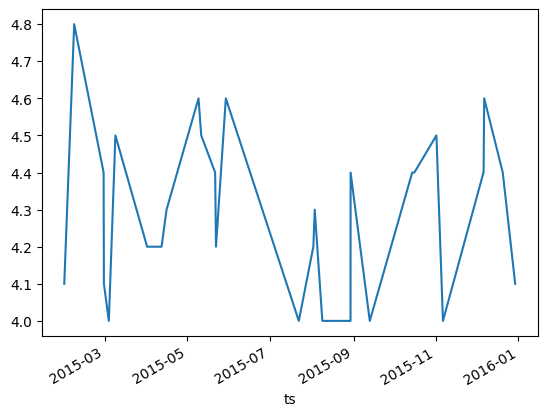

In [ ]:
import numpy as np

quakes[quakes.index.year == 2015]['magnitude'].plot()

(array([6., 3., 4., 2., 8., 3., 3., 1.]),
 array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8]),
 <BarContainer object of 8 artists>)

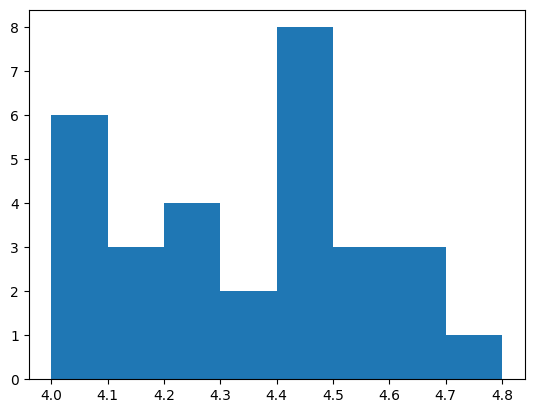

In [ ]:
plt.hist(quakes[quakes.index.year == 2015]['magnitude'], bins=8)

### Resampling Timeseries

<Axes: xlabel='date'>

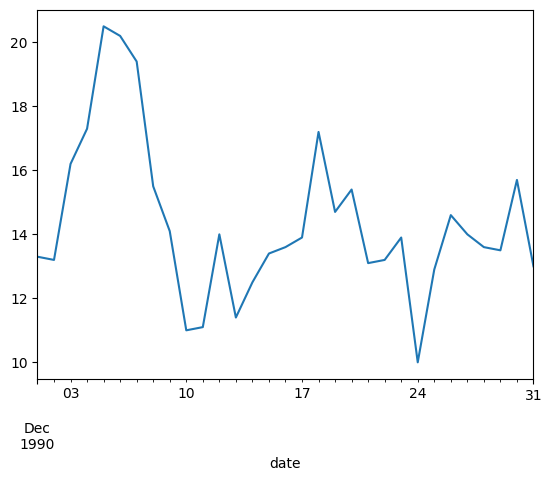

In [ ]:
import pandas as pd
from datetime import datetime

# Read as a dataframe, convert date entries to the index
data = pd.read_csv('daily-min-temperatures.csv', \
                   dtype={'Date': str, 'Temp': float})
data['date'] = data['Date'].apply(\
                                  lambda x: datetime.strptime(x, '%Y-%m-%d'))
data = data.set_index('date')

series = data['Temp']
series[(series.index.year==1990) & (series.index.month==12)].plot()

<Axes: xlabel='date'>

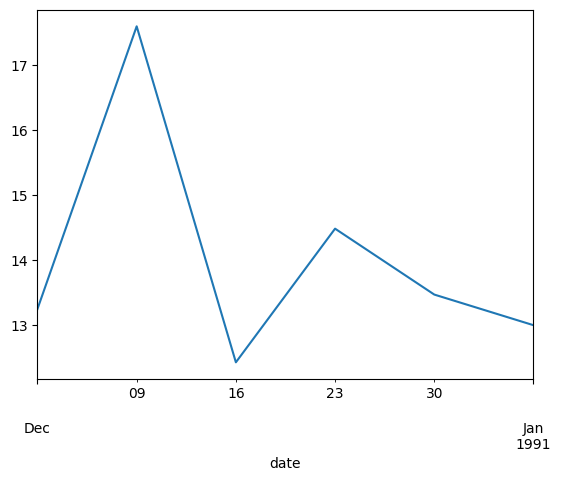

In [ ]:
series[(series.index.year==1990) & (series.index.month==12)].resample('W').mean().plot()

<ipython-input-48-1a0c45438623>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series[(series.index.year==1990) & (series.index.month==12)].resample('H').interpolate(method='linear').plot()


<Axes: xlabel='date'>

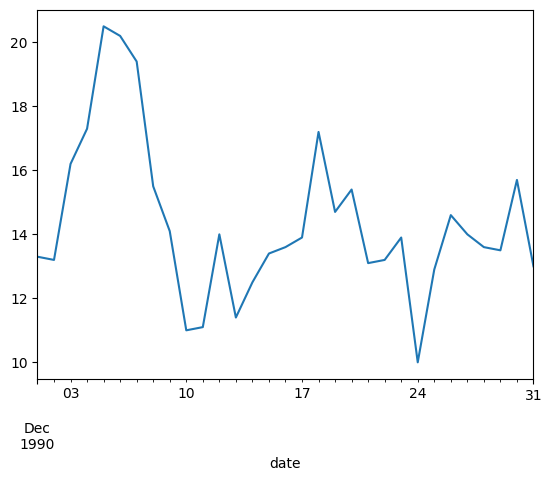

In [ ]:
series[(series.index.year==1990) & (series.index.month==12)].resample('H').interpolate(method='linear').plot()

<ipython-input-50-54794e62caa7>:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series[(series.index.year==1990) & (series.index.month==12)].resample('H').interpolate(method='linear').plot(color='purple', label='Linear')
<ipython-input-50-54794e62caa7>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series[(series.index.year==1990) & (series.index.month==12)].resample('H').interpolate(method='spline',order=2).plot(color='green', label='Spline')


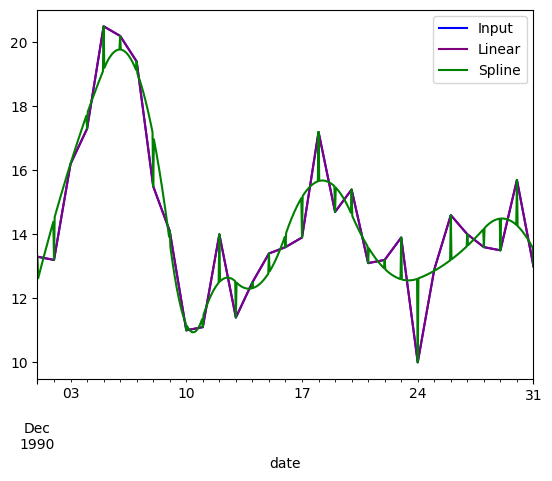

In [ ]:
import matplotlib.pyplot as plt

series[(series.index.year==1990) & (series.index.month==12)].plot(color='blue',label='Input')
series[(series.index.year==1990) & (series.index.month==12)].resample('H').interpolate(method='linear').plot(color='purple', label='Linear')
series[(series.index.year==1990) & (series.index.month==12)].resample('H').interpolate(method='spline',order=2).plot(color='green', label='Spline')
plt.legend()

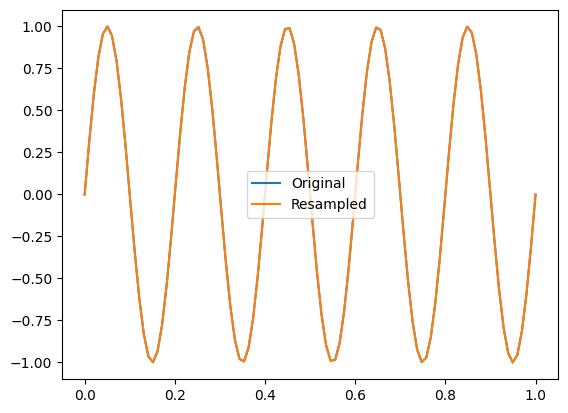

In [2]:
# SciPy includes signal processing functions
import scipy.signal as signal
import numpy as np

# Original signal -- let's set
# sampling points as t
t = np.linspace(0, 1, 100)
# Then evaluate a sine wave at those points
x = np.sin(2 * np.pi * 5 * t)

# Resample to 100 samples
x_resampled = signal.resample(x, 100)

# Plot the original and resampled signals
import matplotlib.pyplot as plt
plt.plot(t, x, label='Original')
plt.plot(np.linspace(0, 1, 100), x_resampled, label='Resampled')
plt.legend()
plt.show()

## Stationarity of Timeseries

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series

def test_stationarity(timeseries, lags=None):
  rolmean = Series.rolling(timeseries, center=False, window=12).mean()
  rolstd = Series.rolling(timeseries, center=False, window=12).std()

  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  print('Results of ADF Test:')
  if lags:
    dftest = adfuller(timeseries, autolag=None, maxlag=lags)
  else:
    dftest = adfuller(timeseries, autolag='AIC')

  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags', 'Observations'])

  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

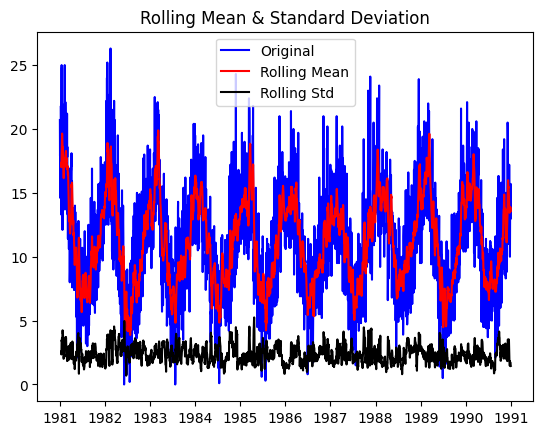

Results of ADF Test:
Test Statistic            -4.444805
p-value                    0.000247
#Lags                     20.000000
Observations            3629.000000
Critical Value (1%)       -3.432153
Critical Value (5%)       -2.862337
Critical Value (10%)      -2.567194
dtype: float64


In [ ]:
# Defaults to 20 lags, not enough to "see" annual seasonality
test_stationarity(data['Temp'])

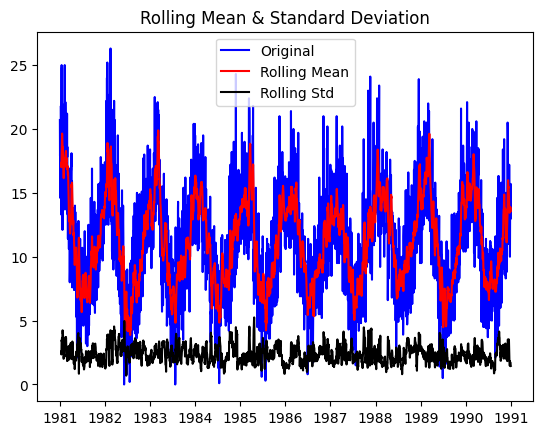

Results of ADF Test:
Test Statistic            -1.631195
p-value                    0.466865
#Lags                    365.000000
Observations            3284.000000
Critical Value (1%)       -3.432343
Critical Value (5%)       -2.862421
Critical Value (10%)      -2.567239
dtype: float64


In [ ]:
# Now give 365 days...
test_stationarity(data['Temp'], 365)

## Timeseries Decomposition and ARIMA

Let's figure out how to decompose timeseries.

Portions of this example are based on https://medium.com/@tirthamutha/time-series-forecasting-using-sarima-in-python-8b75cd3366f2 and https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html#ARIMA-Example-2:-Arima-with-additive-seasonal-effects.

In [ ]:
!wget https://storage.googleapis.com/penn-cis5450/DailyDelhiClimate.csv

--2024-08-01 13:39:16--  https://storage.googleapis.com/penn-cis5450/DailyDelhiClimate.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85248 (83K) [text/csv]
Saving to: ‘DailyDelhiClimate.csv.1’

DailyDelhiClimate.c 100%[===================>]  83.25K  --.-KB/s    in 0.001s  

2024-08-01 13:39:16 (90.4 MB/s) - ‘DailyDelhiClimate.csv.1’ saved [85248/85248]



Rather than the daily Australian dataset, we'll use a Kaggle dataset about daily temperatures in Delhi.  We know temperatures should be correlated day-to-day and season-to-season -- with a 12 month gap between seasons.

https://www.kaggle.com/datasets/sukhmandeepsinghbrar/daily-delhi-climate

<Axes: xlabel='date'>

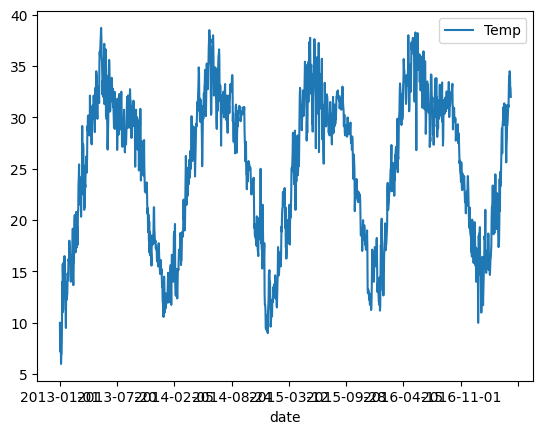

In [ ]:
import pandas as pd

temps = pd.read_csv('DailyDelhiClimate.csv', header=0, index_col=0)

temps = temps[['Temp']]
temps.plot()

Let's look at the correlation between the lags and the data (autocorrelation) for a good region (more than a year)...

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

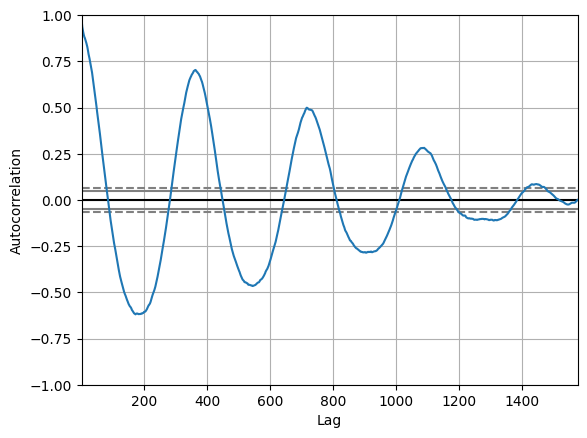

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(temps['Temp'])

And more locally as well...

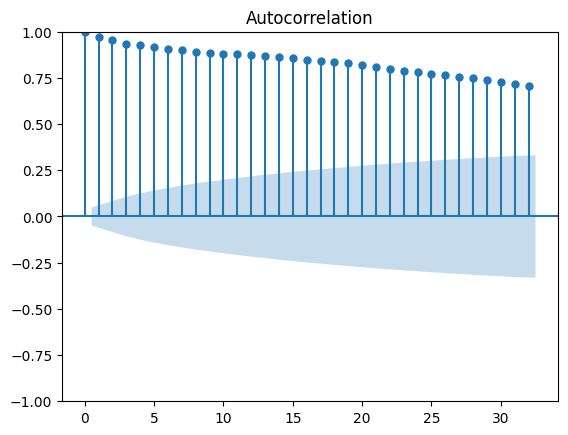

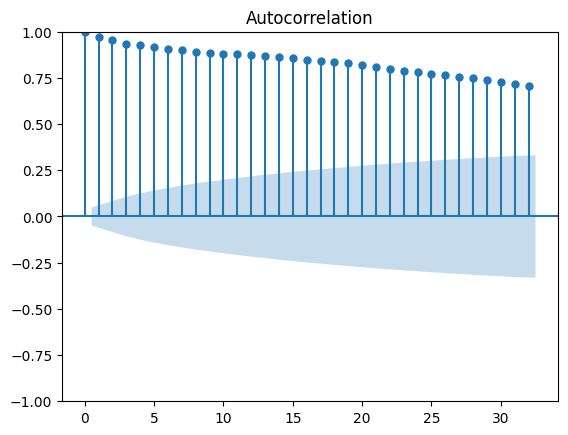

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(temps)

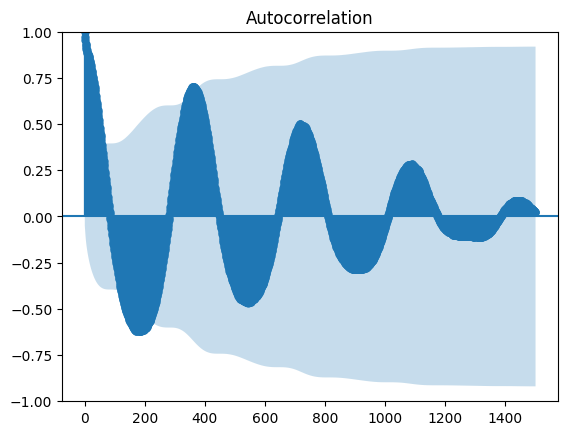

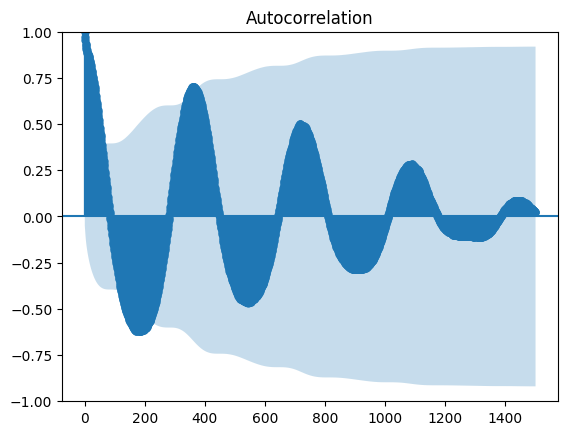

In [ ]:
plot_acf(temps, lags=1500)

Autocorrelation (as above) considers the correlation of the function's value with its distant previous values, indirectly considering all values in between. We can also look at *partial* autocorrelation, which is a direct correlation between the value and its past lag.

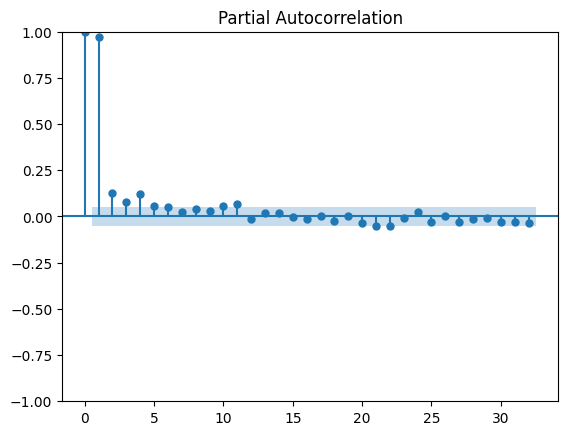

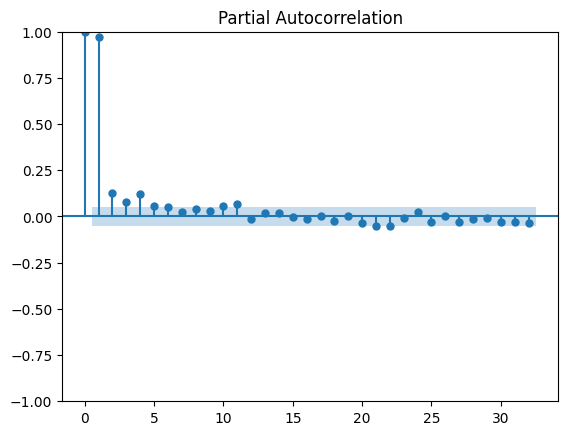

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(temps)

Here we can see that the 3rd lag, for instance, is less correlated than the 4th, 5th, etc.

## Finding ARIMA/SARIMA Hyperparameters

We have both ARIMA (which follows *small, short-term seasonality within the lags*, as well as longer tremds) and SARIMA (which allows us to include a longer-term seasonal element).

The above plots let us understand how many lags make sense.  We can further fine-tune (p,d,q) for "local" and "seasonal" components with grid search -- but even basic values are likely to work well.

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pmd
model = pmd.auto_arima(temps['Temp'],start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5995.445, Time=26.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6104.687, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6067.988, Time=3.89 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6056.265, Time=4.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6102.796, Time=0.13 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=5996.594, Time=8.33 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5996.566, Time=9.66 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=5996.702, Time=27.07 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=5996.640, Time=21.94 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5995.198, Time=2.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6054.571, Time=1.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6066.213, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=5997.066, Time=1.22 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=5997.088, Time=0.88 sec
 ARIMA(0,1,2)(0,

In [ ]:
import statsmodels.api as sm

sarima=sm.tsa.statespace.SARIMAX(temps,order=(1,1,1),seasonal_order=(1,0,1,12))
predicted=sarima.fit().predict();

# Let's compare against a model without the Seasonal component
sarima=sm.tsa.statespace.SARIMAX(temps,order=(1,1,1))
predicted2=sarima.fit().predict();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


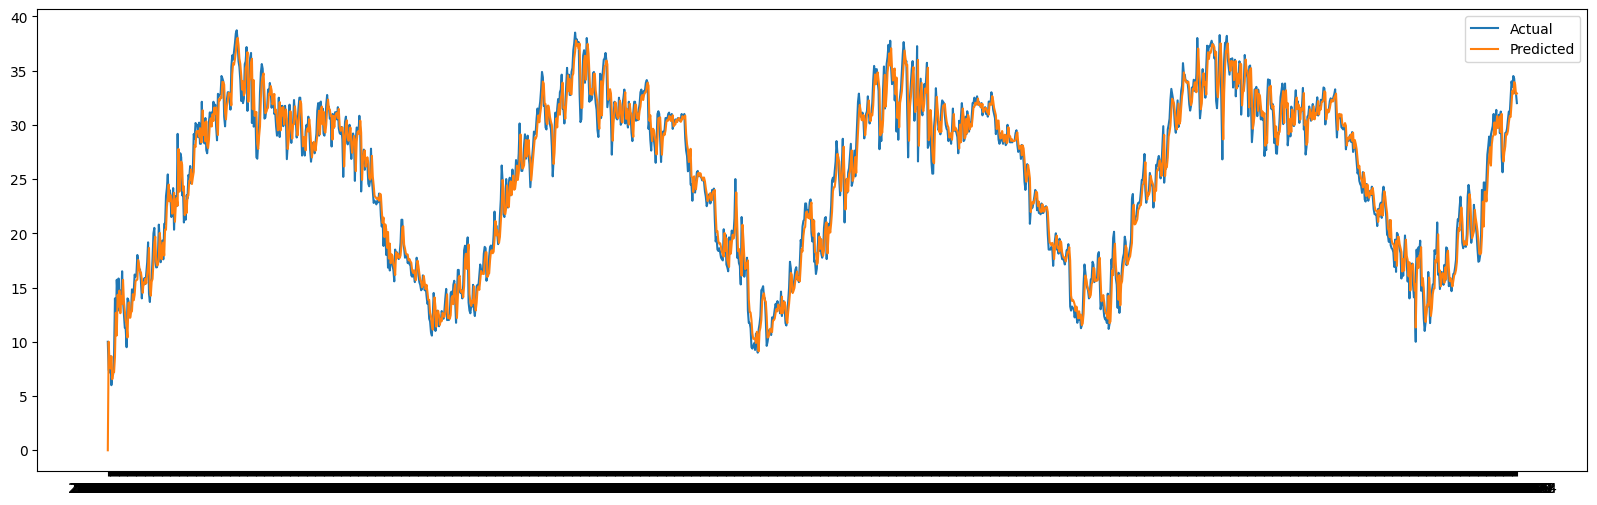

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(temps['Temp'],label='Actual')
plt.plot(predicted,label='Predicted')
# plt.plot(predicted,label='Nonseasonal')

plt.legend()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = temps.copy()

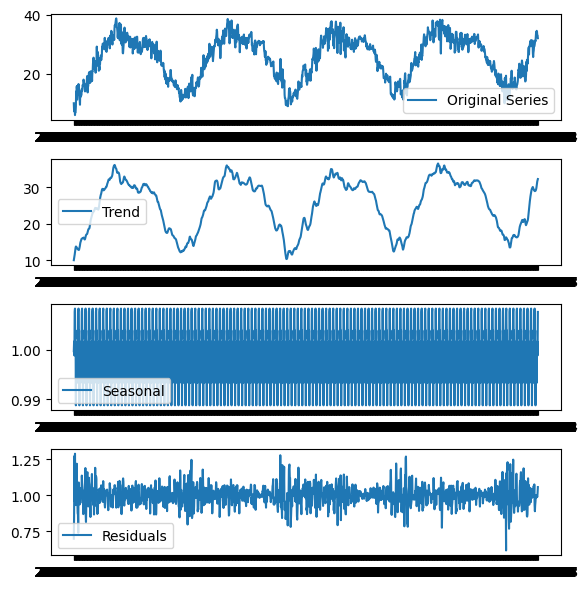

In [ ]:
result = seasonal_decompose(df['Temp'], model='multiplicative', period=12)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(4,6))

plt.subplot(4, 1, 1)
plt.plot(df['Temp'], label='Original Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()
